Построим график функции $x^2-20sin(x)$ чтобы локализовать корни

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Принимает функию и отрезок и массив линий
def plot_func_with_lines(func, segment, vlines = None, hlines = None, show_axeX = True, get_max = False):
    a = segment[0]
    b = segment[1]
    xs = np.linspace(a, b, 10000)
    ys = func(xs)
    
    plt.figure(figsize=(8,5))
    plt.plot(xs, ys)
    if show_axeX:
        plt.axhline(0, color='black', linewidth=1)
    if vlines is not None:
        for vline in vlines:
            plt.vlines(vline, ymin=min(ys), ymax=max(ys), color='red', linestyles='--')
    if hlines is not None:
        for hline in hlines:
            plt.hlines(hline, xmin=min(xs), xmax=max(xs), color='red', linestyles='--')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.show()
    
    if get_max:
        return max(ys)

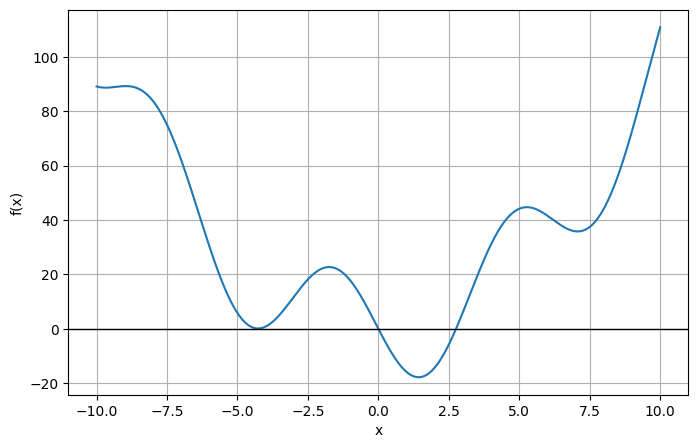

In [25]:
f = lambda x: x ** 2 - 20 * np.sin(x)

plot_func_with_lines(func=f, segment=[-10, 10])

Рассмотрим отдельно каждую область:

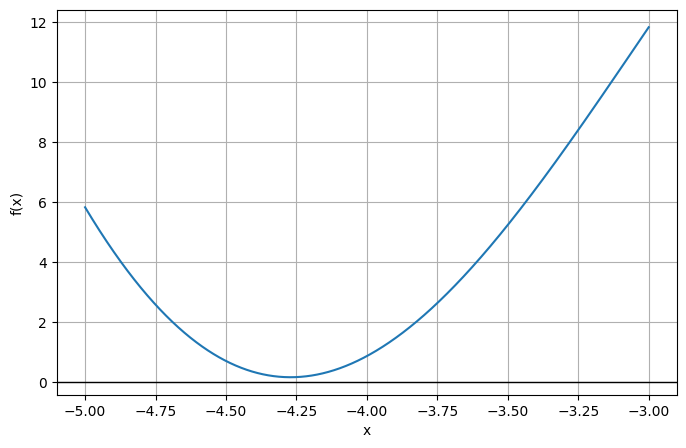

In [26]:
plot_func_with_lines(func=f, segment=[-5, -3])

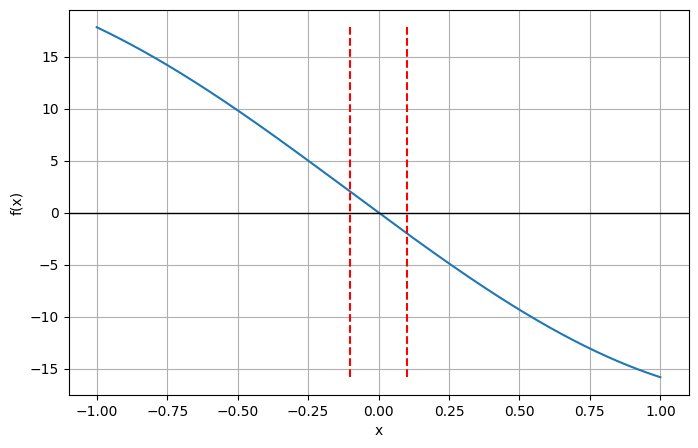

In [27]:
plot_func_with_lines(func=f, segment=[-1, 1], vlines=[-0.1, 0.1])

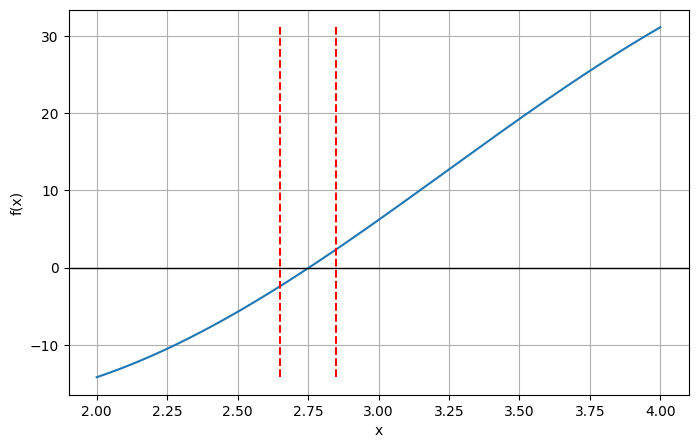

In [28]:
plot_func_with_lines(func=f, segment=[2, 4], vlines=[2.65, 2.85])

Получаем две области локализации корней:
- $x_1 \in [-0.1, 0.1]$ (истинный $x_1 = 0$)
- $x_2 \in [2.65, 2.85]$ (истинный $x_2 \approx 2.7529466338187047$)

Рассмотрим вторую области $\Rightarrow \tilde x \in [2.65, 2.85]$

Возьмем $g(x)=x - \frac{f(x)}{M}$ ($M$ - константа, удолетворяющая условию $|g'(x)|<1 \quad \forall i \in [2.65, 2.85]$). 

$|g'(x)|=|1 - \frac{f'(x)}{M}|=|1 - \frac{2x - 20cos(x)}{M}|<1 \Rightarrow \frac{2x - 20cos(x)}{M} < 2 \Rightarrow x - 10cos(x) < M \Rightarrow$ возьмем $М = 25$

Получаем $g(x)=x - \frac{f(x)}{25}$ и $\tilde x = g(\tilde x)$

Проверим, что отображение `g(x)` сжимающее, тогда по достаточному условию должно выполняться:
- $g([2.65, 2.85]) \subseteq [2.65, 2.85]$
- $|g'(x)|<1 \quad \forall x \in [2.65, 2.85]$


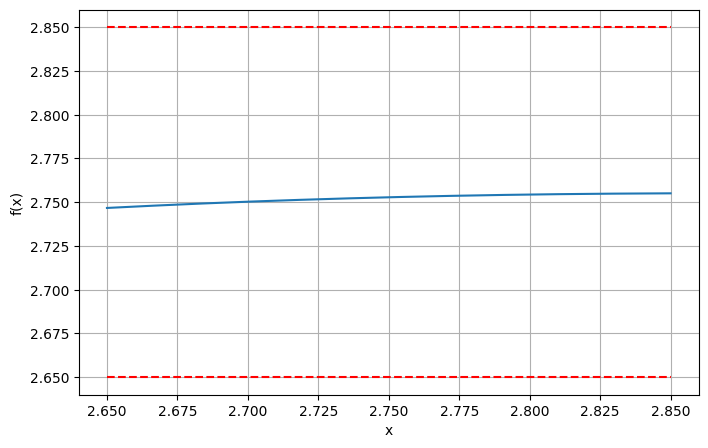

In [29]:
g = lambda x: x - f(x)/25
plot_func_with_lines(func=g, segment=[2.65, 2.85], hlines=[2.65, 2.85], show_axeX=False)

Получаем $g([2.65, 2.85]) \subseteq [2.65, 2.85]$

Теперь проверим производную

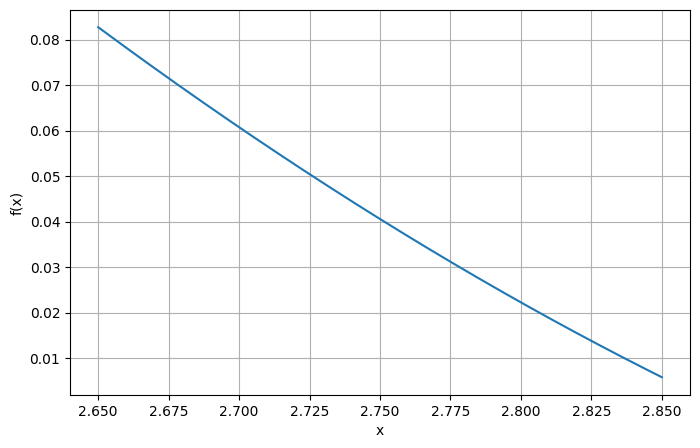

|g'(x)| <= 0.08273424329737122


In [35]:
g_derative = lambda x: np.abs(1 - (2 * x - 20 * np.cos(x))/25)
max_g_derative = plot_func_with_lines(func=g_derative, segment=[2.65, 2.85], show_axeX=False, get_max = True)
print(f"|g'(x)| <= {max_g_derative}")

Получаем $|g'(x)| \le q = 0.083 < 1 \quad \forall x \in [2.65, 2.85]$

Для $g(x)$ выполнено достаточное условие $\Rightarrow$ отображение $g(x)$ - сжимающее.

Получаем cходящийся итерационный процесс:
$$x_{n+1}=x_n - \frac{x_n^2 - 20 sin(x_n)}{25}$$

Оценим число итераций k МПИ для достижения точности $\varepsilon = 10^{-3}$:
- $q = 0.083$
- $|\tilde x - x^k| \le 10^{-3}$
- $e_0 = |b-a| = 0.2$
- $e_k = |\tilde x - x^{k}| = |g(\tilde x) - g(x^k)| \leq q|\tilde x - x^{k-1}| = qe_{k-1} \le \dots \le q^{k}e_0$
- $q^{k}e_0 \le \varepsilon$

Получаем $k \ge \frac{ln(\frac{\varepsilon}{e_0})}{ln(q)} \Rightarrow k \ge 2.13$

Приблизительно нужно `k = 3` итераций (сходится быстро, так как довольно маленькое $q$)

In [104]:
import random
x = random.uniform(2.65, 2.85)
print(f"x0 = {x}")
for i in range(5):
    x = g(x)
    if np.abs(x - 2.7529466338187047) <= 10**(-3):
        print(f"x{i + 1} = {x}, ошибка <= eps")
    else:
        print(f"x{i + 1} = {x}")

x0 = 2.8197656354964753
x1 = 2.754762749870815
x2 = 2.7530176046766193, ошибка <= eps
x3 = 2.7529494309427474, ошибка <= eps
x4 = 2.752946744096299, ошибка <= eps
x5 = 2.7529466381664944, ошибка <= eps


Получили приближение за три итерации $x = 2.7529494309427474$

Теперь воспользуемся методом Ньютона:
$x^{k+1} = x^k - \frac{f(x^k)}{f'(x^k)}$

In [108]:
f = lambda x: x ** 2 - 20 * np.sin(x)
f_dec = lambda x: 2 * x - 20 * np.cos(x)

x = 2.7529494309427474
print(f"x0 = {x}")
for i in range(5):
    x = x - f(x) / f_dec(x)
    print(f"x{i + 1} = {x}")

x0 = 2.7529494309427474
x1 = 2.7529466338202653
x2 = 2.7529466338187047
x3 = 2.7529466338187047
x4 = 2.7529466338187047
x5 = 2.7529466338187047


Видно, что метод сходится за две итерации.

Покажем это также теоритически, для этого нужно показать что отображение $g(x) = x - \frac{f(x)}{f'(x)}$ - сжимающее

$g(x) = x - \frac{x^2 - 20sin(x)}{2x - 20cos(x)}$

По достаточному условию должно выполняться:
- $g([a, b]) \subseteq [a, b]$
- $|g'(x)|<1 \quad \forall x \in [a, b]$

где $[a, b] = [\tilde x - \varepsilon, \tilde x + \varepsilon] \subseteq [2.74294, 2.76295]$, так как начинаем с приближения полученного МПИ

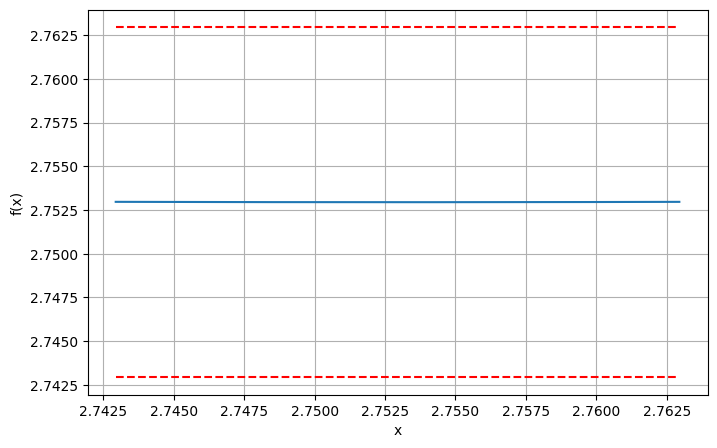

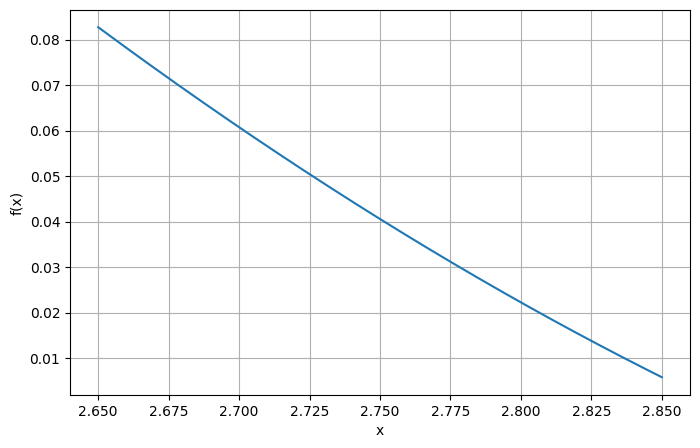

|g'(x)| <= 0.08273424329737122


In [110]:
f = lambda x: x ** 2 - 20 * np.sin(x)
f_dec = lambda x: 2 * x - 20 * np.cos(x)
f_2dec = lambda x: x + 20 * np.sin(x)

g = lambda x: x - f(x)/f_dec(x)
g_dec = lambda x: np.abs(f(x) * f_2dec(x) / f_dec(x)**2)

plot_func_with_lines(func=g, segment=[2.74294, 2.76295], hlines=[2.74294, 2.76295], show_axeX=False)
max_g_derative = plot_func_with_lines(func=g_derative, segment=[2.65, 2.85], show_axeX=False, get_max = True)
print(f"|g'(x)| <= {max_g_derative}")

Оба условия выполняются $\Rightarrow$ `g(x)` - сжимающее $\Rightarrow$ м.Ньютона сходится


Ошибка в методе Ньютона убывает как квадратичная ($e_k = C e_{k-1}^2$)

Для начального приближения с ошибкой $e_0 \le \varepsilon = 10^{-3}$, получим что через 3 итерации $e_3 \sim {\varepsilon}^{(2^{3})} = {\varepsilon}^{(8)} = 10^{-24} \ll \varepsilon_{маш} = 10^{-16} \Rightarrow$ достигнем машинной точности и значение уже не будет меняться